# Background and Context:

Airbnb is an online platform that allows people to rent short term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.



# Problem Statement:

As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for an accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

# Objective :

* Explore and visualize the dataset.
* Build a linear regression model to predict the log of rental price
* Generate a set of insights and recommendations that will help the business.

# Data Dictionary :

1. id - Property ID
2. room_type	- Type of Room in the property
3. accommodates	- How many adults can this property accomodate
4. bathrooms	- Number of bathrooms in the property
5. cancellation_policy	- Cancellation policy of the property
6. cleaning_fee	- This denotes whether the property's cleaning fee is included in the rent or not
7. instant_bookable	- It indicates whether an instant booking facility is available or not
8. review_scores_rating	- The review rating score of the property
9. bedrooms	- Number of bedrooms in the property
10. beds	- Total number of beds in the property
11. log_price	- Log of the rental price of the property for a fixed period 

# Import neccesary Libaries :

In [91]:
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Loading and exploring the data :

In [2]:
df = pd.read_csv("AirBNB.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

np.random.seed(1)  # To get the same random results every time
df.sample(n=10)

There are 74111 rows and 11 columns.


,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
56850,13586614,Entire home/apt,5.0,2.0,strict,False,f,100.0,2.0,3.0,7.408531
68140,18222981,Private room,3.0,1.0,strict,True,f,95.0,1.0,2.0,4.605170
23189,13915528,Entire home/apt,2.0,1.0,strict,True,f,95.0,1.0,2.0,4.094345
47255,7122067,Private room,1.0,1.0,flexible,False,f,100.0,1.0,1.0,4.317488
45933,12384924,Entire home/apt,5.0,2.0,strict,True,f,95.0,2.0,3.0,5.433722
66955,3999628,Private room,2.0,1.0,moderate,True,f,98.0,1.0,1.0,5.010635
18553,4948442,Entire home/apt,1.0,1.0,strict,False,f,NaN,0.0,1.0,5.010635
26117,666837,Shared room,16.0,2.0,flexible,False,f,76.0,1.0,1.0,2.708050
65737,15929932,Entire home/apt,10.0,1.0,strict,False,f,93.0,2.0,2.0,4.976734
8915,21173263,Entire home/apt,3.0,1.0,strict,True,f,95.0,0.0,2.0,4.700480


In [3]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [4]:
df.tail()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
74106,14549287,Private room,1.0,1.0,flexible,False,f,NaN,1.0,1.0,4.605170
74107,13281809,Entire home/apt,4.0,2.0,moderate,True,f,93.0,2.0,4.0,5.043425
74108,18688039,Entire home/apt,5.0,1.0,moderate,True,t,94.0,2.0,2.0,5.220356
74109,17045948,Entire home/apt,2.0,1.0,strict,True,t,NaN,0.0,2.0,5.273000
74110,3534845,Entire home/apt,4.0,1.0,moderate,False,f,96.0,1.0,2.0,4.852030


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


Observations:
    
    * There are one int variable, 6 float variables and 4 objects where objects need to be converted into category variables .

In [6]:
print(df.columns)

Index(['id', 'room_type', 'accommodates', 'bathrooms', 'cancellation_policy',
       'cleaning_fee', 'instant_bookable', 'review_scores_rating', 'bedrooms',
       'beds', 'log_price'],
      dtype='object')


In [7]:
# let us look at the shape of the data
df.shape

(74111, 11)

In [8]:
# Summary of dataset
df.describe(include='all')

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,NaN,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,NaN,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,NaN,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,1.126662e+07,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


# Data Preprocessing:

In [9]:
df['room_type'] = df.room_type.astype('category')
df['cancellation_policy'] = df.cancellation_policy.astype('category')
df['cleaning_fee'] = df.cleaning_fee.astype('category')
df['instant_bookable'] = df.instant_bookable.astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    74111 non-null  int64   
 1   room_type             74106 non-null  category
 2   accommodates          74108 non-null  float64 
 3   bathrooms             73908 non-null  float64 
 4   cancellation_policy   74103 non-null  category
 5   cleaning_fee          74107 non-null  category
 6   instant_bookable      74111 non-null  category
 7   review_scores_rating  57389 non-null  float64 
 8   bedrooms              74019 non-null  float64 
 9   beds                  73980 non-null  float64 
 10  log_price             74111 non-null  float64 
dtypes: category(4), float64(6), int64(1)
memory usage: 4.2 MB


* data type of all the columns have been fixed.

In [11]:
df = df.drop(['id'],axis=1) 

* We dropped the id column as it is not mandatory for our datamodelling and also automatic serial number is already been generated 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   room_type             74106 non-null  category
 1   accommodates          74108 non-null  float64 
 2   bathrooms             73908 non-null  float64 
 3   cancellation_policy   74103 non-null  category
 4   cleaning_fee          74107 non-null  category
 5   instant_bookable      74111 non-null  category
 6   review_scores_rating  57389 non-null  float64 
 7   bedrooms              74019 non-null  float64 
 8   beds                  73980 non-null  float64 
 9   log_price             74111 non-null  float64 
dtypes: category(4), float64(6)
memory usage: 3.7 MB


In [13]:
df[df.duplicated()].count()

room_type               19994
accommodates            19994
bathrooms               19986
cancellation_policy     19994
cleaning_fee            19994
instant_bookable        19994
review_scores_rating    13487
bedrooms                19994
beds                    19988
log_price               19994
dtype: int64

In [14]:
df.isna().sum()

room_type                   5
accommodates                3
bathrooms                 203
cancellation_policy         8
cleaning_fee                4
instant_bookable            0
review_scores_rating    16722
bedrooms                   92
beds                      131
log_price                   0
dtype: int64

# Treating missing values:

In [15]:
# we will replace missing values in every column with its medain
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller,axis=0)

In [16]:
df.isna().sum()

room_type               5
accommodates            0
bathrooms               0
cancellation_policy     8
cleaning_fee            4
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

In [17]:
# Check the unique values in each column of the dataframe.
df.nunique()

room_type                 3
accommodates             16
bathrooms                17
cancellation_policy       3
cleaning_fee              2
instant_bookable          2
review_scores_rating     54
bedrooms                 11
beds                     18
log_price               767
dtype: int64

# Checking for Duplicates :

In [18]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74106     True
74107    False
74108    False
74109    False
74110    False
Length: 74111, dtype: bool

In [19]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74106     True
74107    False
74108    False
74109    False
74110    False
Length: 74111, dtype: bool

In [20]:
df[df.duplicated()].count()

room_type               21138
accommodates            21138
bathrooms               21138
cancellation_policy     21138
cleaning_fee            21138
instant_bookable        21138
review_scores_rating    21138
bedrooms                21138
beds                    21138
log_price               21138
dtype: int64

# Identifying and Dropping Duplicates in the data:

In [21]:
#Identify duplicates records in the data
dupes=df.duplicated()
sum(dupes)

21138

In [22]:
df.shape

(74111, 10)

In [23]:
data1=df.drop_duplicates()

In [24]:
#Identify duplicates in complaints data based on room_type
dupe_room_type =df.room_type.duplicated()

In [25]:
#Create a new dataset by removing duplicates based on cust_id in Complaints data
comp_data2=df.drop_duplicates(['room_type'])

comp_data2.shape

(4, 10)

In [26]:
data1.shape

(52973, 10)

In [27]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52973 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   room_type             52968 non-null  category
 1   accommodates          52973 non-null  float64 
 2   bathrooms             52973 non-null  float64 
 3   cancellation_policy   52965 non-null  category
 4   cleaning_fee          52969 non-null  category
 5   instant_bookable      52973 non-null  category
 6   review_scores_rating  52973 non-null  float64 
 7   bedrooms              52973 non-null  float64 
 8   beds                  52973 non-null  float64 
 9   log_price             52973 non-null  float64 
dtypes: category(4), float64(6)
memory usage: 3.0 MB


In [28]:
data1[data1.duplicated()].count()

room_type               0
accommodates            0
bathrooms               0
cancellation_policy     0
cleaning_fee            0
instant_bookable        0
review_scores_rating    0
bedrooms                0
beds                    0
log_price               0
dtype: int64

* Data duplicates have been treated and removed successfully.

In [29]:
data1.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,96.0,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [30]:
data1['bathrooms'] = data1.bathrooms.astype('int64')
data1['bedrooms'] = data1.bedrooms.astype('int64')
data1['beds'] = data1.beds.astype('int64')
data1['accommodates'] = data1.accommodates.astype('int64')

In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52973 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   room_type             52968 non-null  category
 1   accommodates          52973 non-null  int64   
 2   bathrooms             52973 non-null  int64   
 3   cancellation_policy   52965 non-null  category
 4   cleaning_fee          52969 non-null  category
 5   instant_bookable      52973 non-null  category
 6   review_scores_rating  52973 non-null  float64 
 7   bedrooms              52973 non-null  int64   
 8   beds                  52973 non-null  int64   
 9   log_price             52973 non-null  float64 
dtypes: category(4), float64(2), int64(4)
memory usage: 3.0 MB


# Univariate analysis:

In [32]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

# Observations on bathrooms :

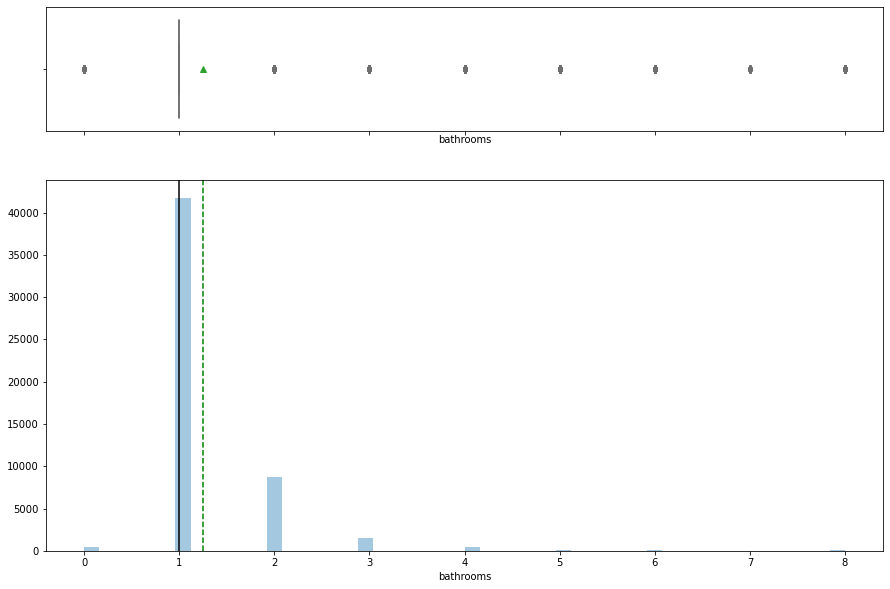

In [33]:
histogram_boxplot(data1["bathrooms"])

# Observations on beds:

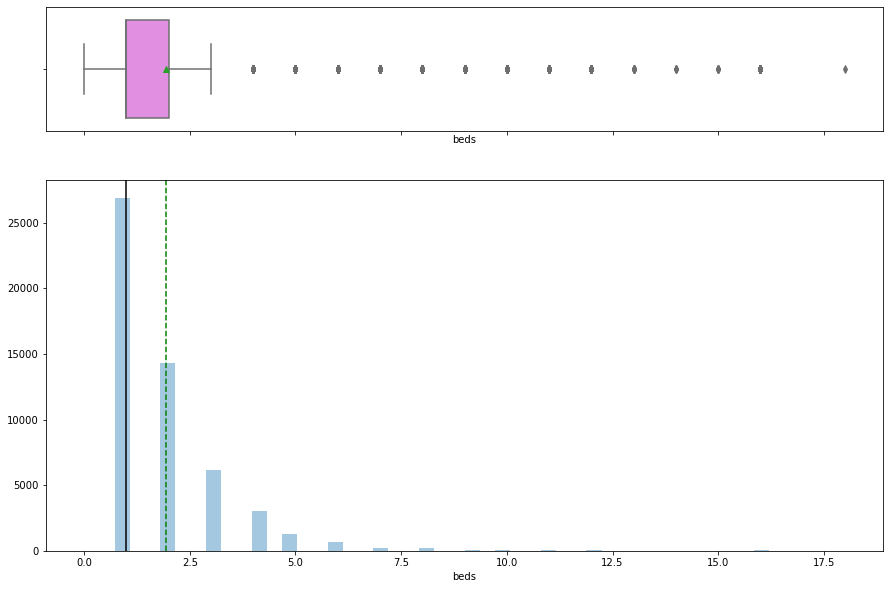

In [34]:
histogram_boxplot(data1["beds"])

# Observations on accommodates:

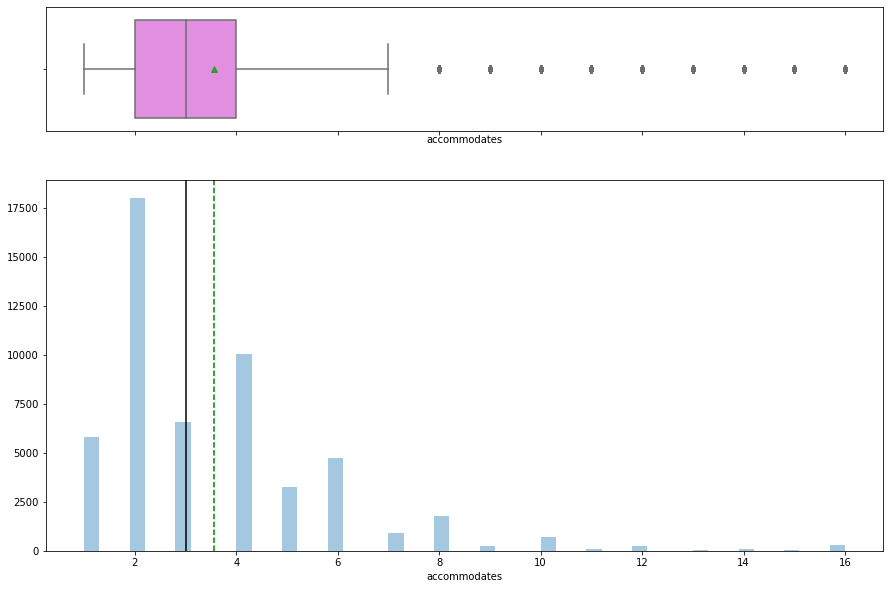

In [35]:
histogram_boxplot(data1["accommodates"])

# Observations on review_scores_rating:

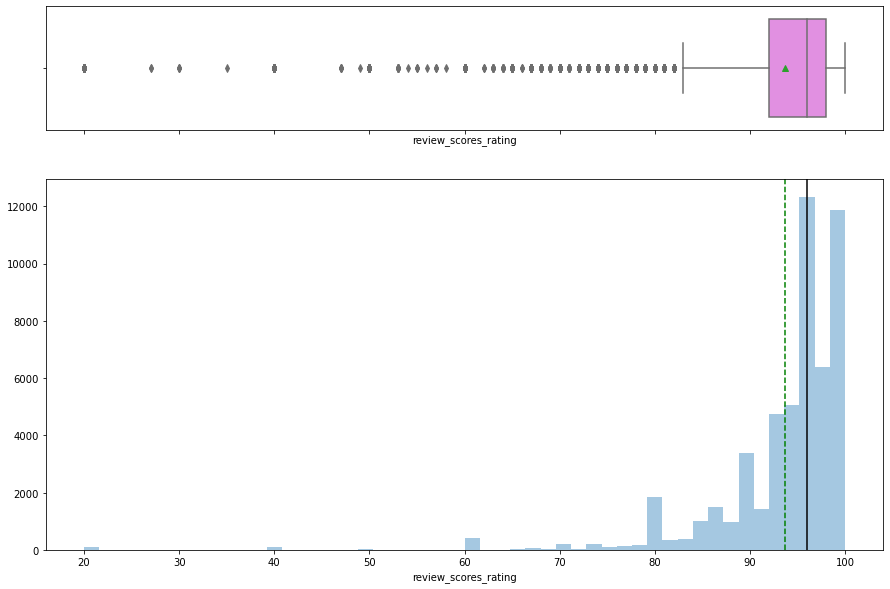

In [36]:
histogram_boxplot(data1["review_scores_rating"])

# Observations on log_price:

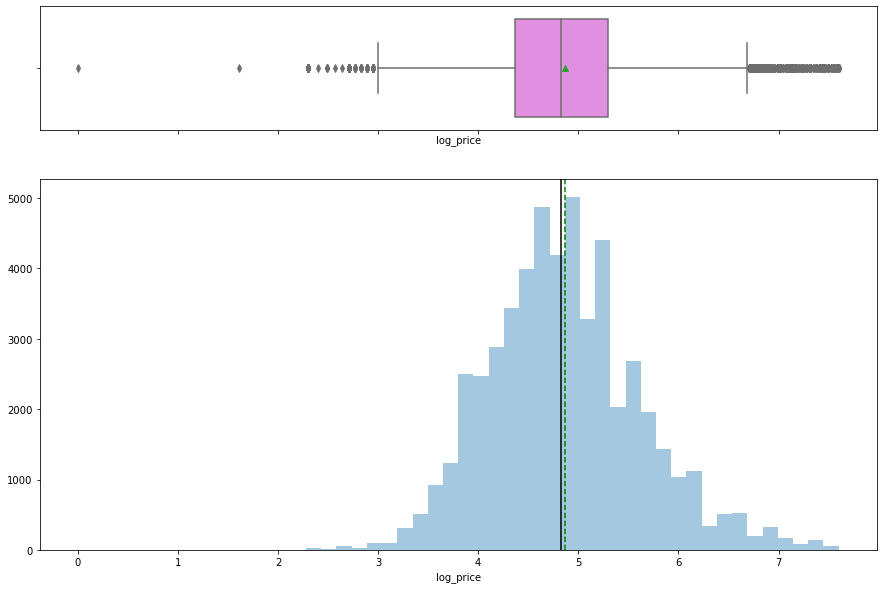

In [37]:
histogram_boxplot(data1["log_price"])

# Observations on bedrooms :

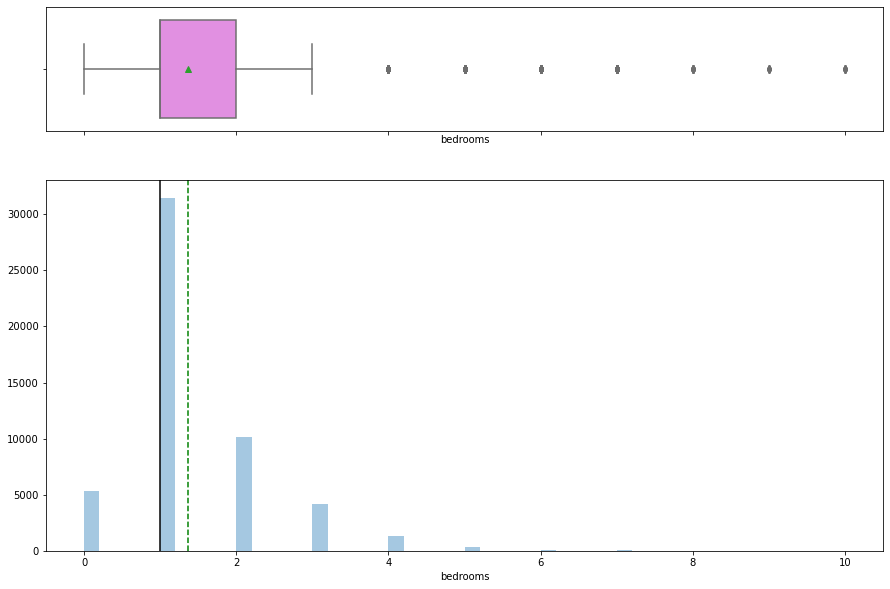

In [38]:
histogram_boxplot(data1["bedrooms"])

# Distribution of each numerical variable:

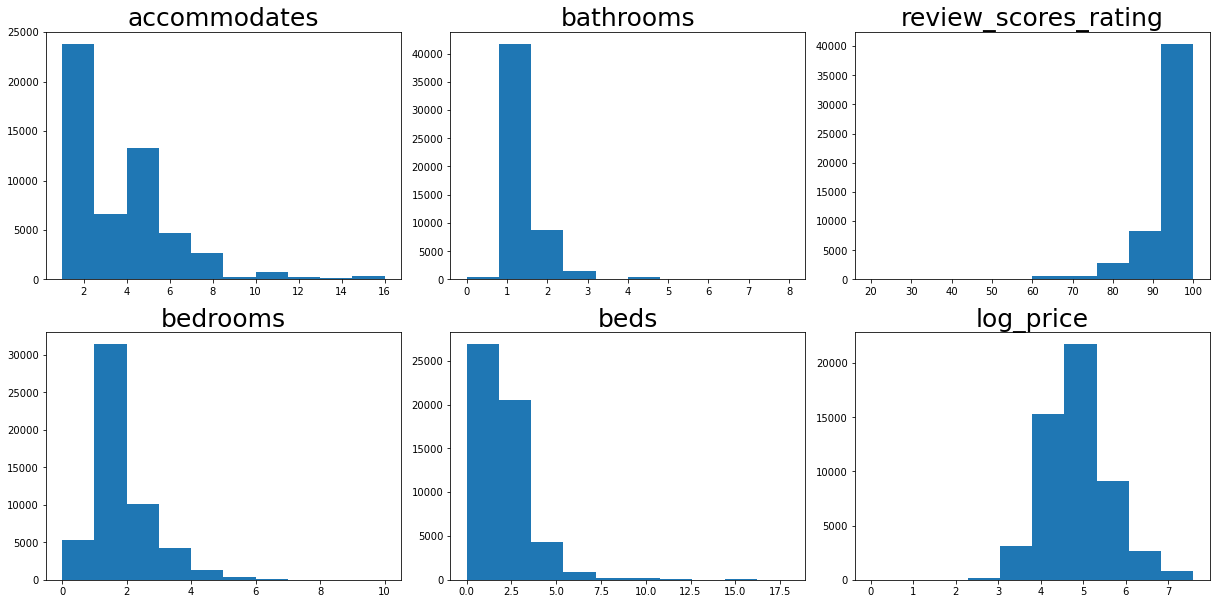

In [39]:
# lets plot histogram of all plots
from scipy.stats import norm
all_col = data1.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(17,75))

for i in range(len(all_col)):
    plt.subplot(18,3,i+1)
    plt.hist(data1[all_col[i]])
    #sns.displot(df[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=25)
    

plt.show()

# Lets look at outliers in every numerical column

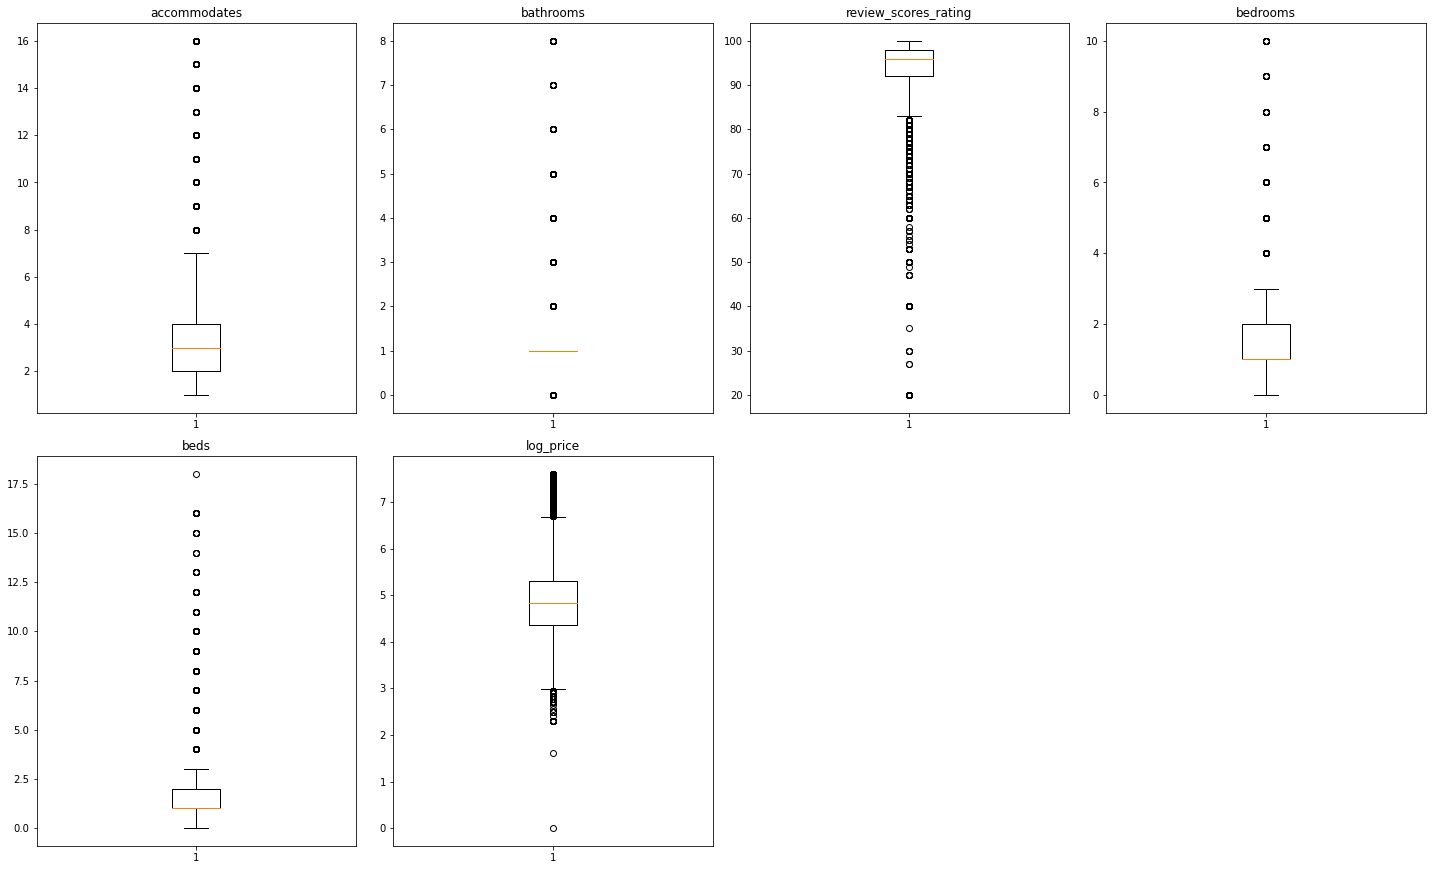

In [40]:
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(data1[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [41]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage

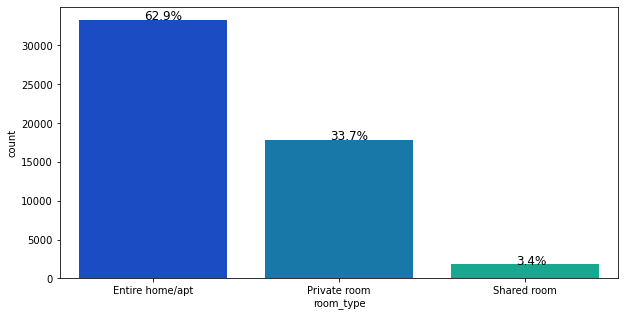

In [42]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data1["room_type"], palette="winter")
perc_on_bar(ax, data1["room_type"])

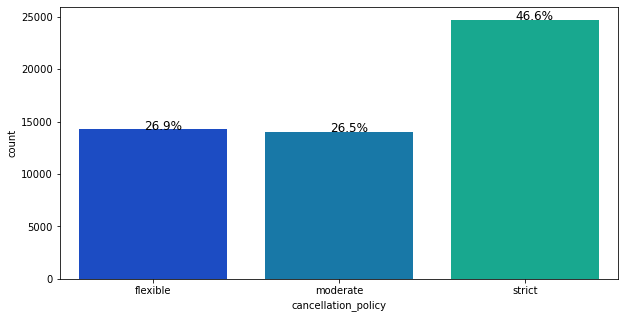

In [43]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data1["cancellation_policy"], palette="winter")
perc_on_bar(ax, data1["cancellation_policy"])

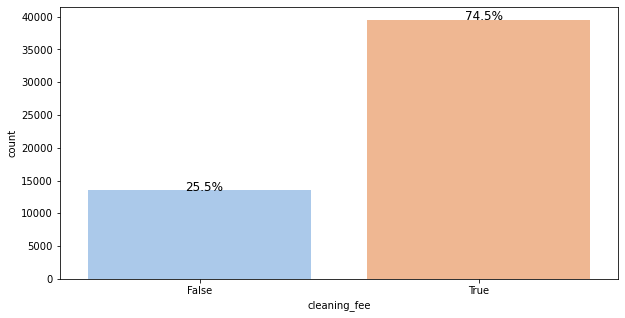

In [44]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data1["cleaning_fee"], palette="pastel")
perc_on_bar(ax, data1["cleaning_fee"])

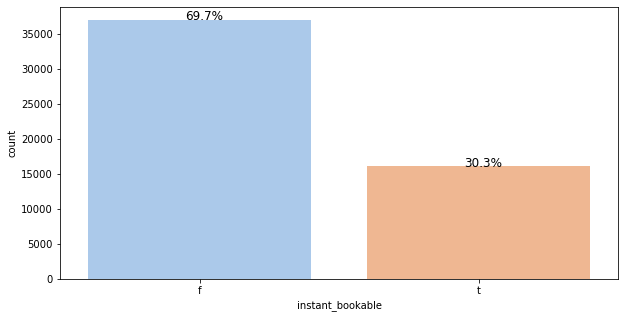

In [45]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data1["instant_bookable"], palette="pastel")
perc_on_bar(ax, data1["instant_bookable"])

# Comparison Between Target variable with other variables(Multivariate Analysis :

# log_price Vs room_type:

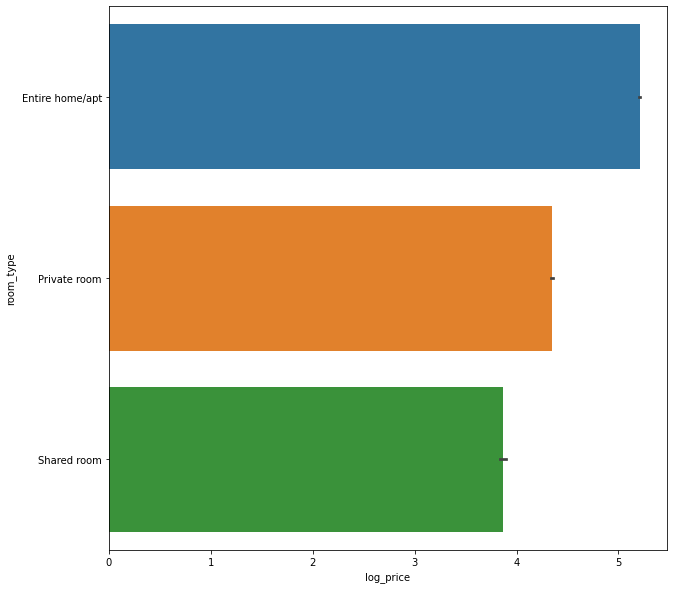

In [46]:
plt.figure(figsize=(10,10))
sns.barplot(data1['log_price'],data1['room_type'])
plt.show()

# log_price Vs cancellation_policy:

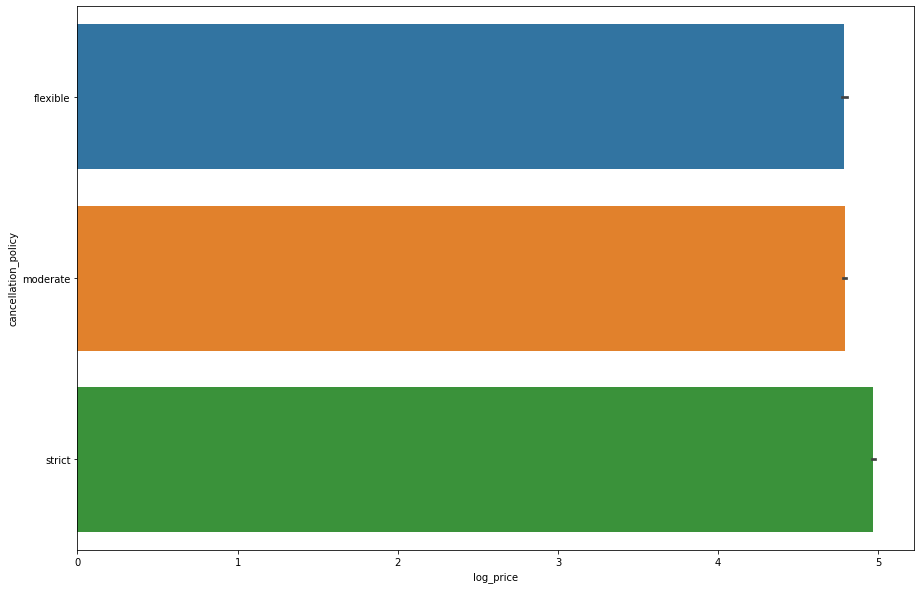

In [47]:
plt.figure(figsize=(15,10))
sns.barplot(data1['log_price'],data1['cancellation_policy'])
plt.show()

# log_price Vs cleaning_fee:

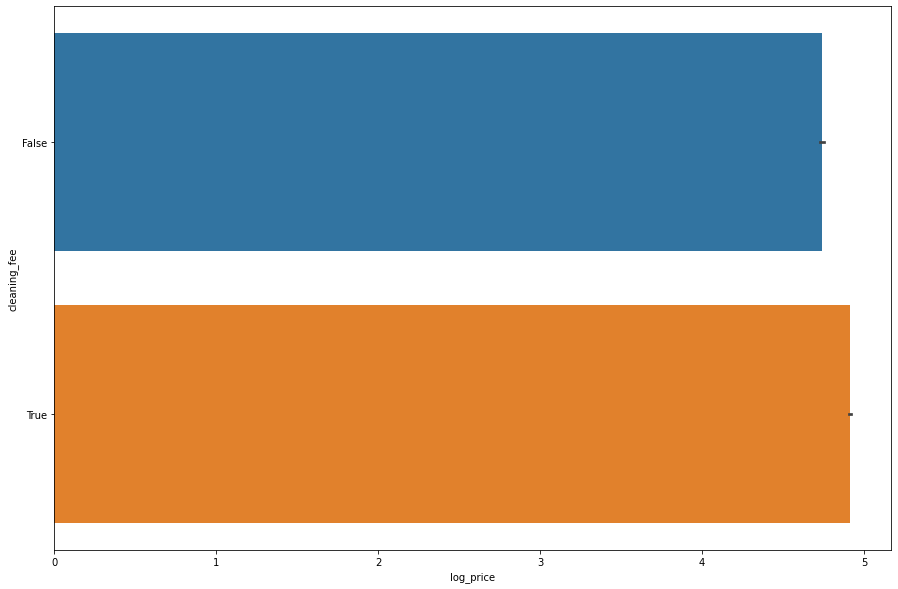

In [48]:
plt.figure(figsize=(15,10))
sns.barplot(data1['log_price'],data1['cleaning_fee'])
plt.show()

# log_price Vs review_scores_rating Vs room_type using ScatterPlots:

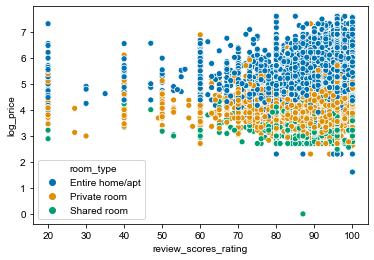

In [49]:
sns.scatterplot(x = "review_scores_rating", y = "log_price", hue='room_type' ,data = data1, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

# log_price Vs review_scores_rating Vs instant_bookable using ScatterPlots:

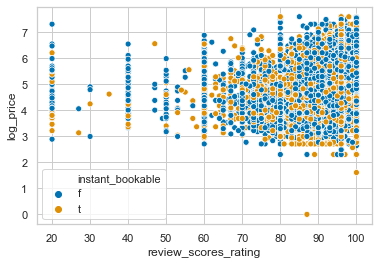

In [50]:
sns.scatterplot(x = "review_scores_rating", y = "log_price", hue='instant_bookable' ,data = data1, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

# accommodates Vs review_scores_rating Vs room_type using ScatterPlots:

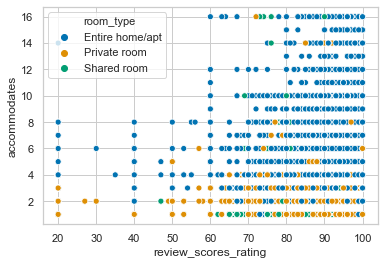

In [51]:
sns.scatterplot(x = "review_scores_rating", y = "accommodates", hue='room_type' ,data = data1, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

# log_price Vs accommodates Vs room_type using ScatterPlots:

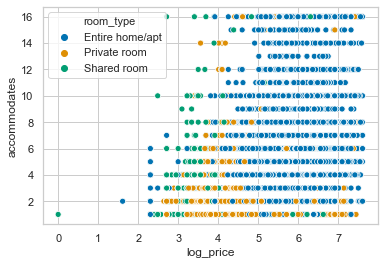

In [52]:
sns.scatterplot(x = "log_price", y = "accommodates", hue='room_type' ,data = data1, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

# log_price Vs bedrooms Vs room_type using ScatterPlots:

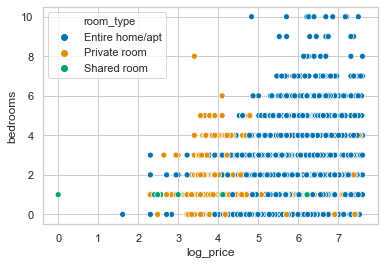

In [53]:
sns.scatterplot(x = "log_price", y = "bedrooms", hue='room_type' ,data = data1, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

# log_price Vs bathrooms Vs room_type using ScatterPlots:

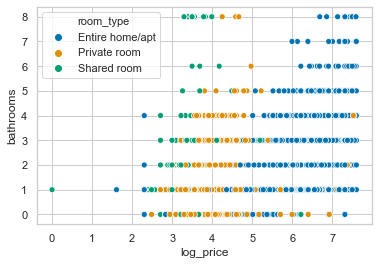

In [54]:
sns.scatterplot(x = "log_price", y = "bathrooms", hue='room_type' ,data = data1, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

# log_price Vs cancellation_policy Vs room_type using ScatterPlots:

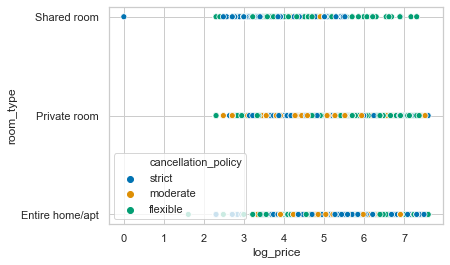

In [55]:
sns.scatterplot(x = "log_price", y = "room_type", hue='cancellation_policy' ,data = data1, palette='colorblind')
sns.set(style='whitegrid')
plt.show()

# Bivariate Analysis:

In [ ]:
sns.pairplot(data=data1,hue="log_price")
plt.show()

# Correlation Map:

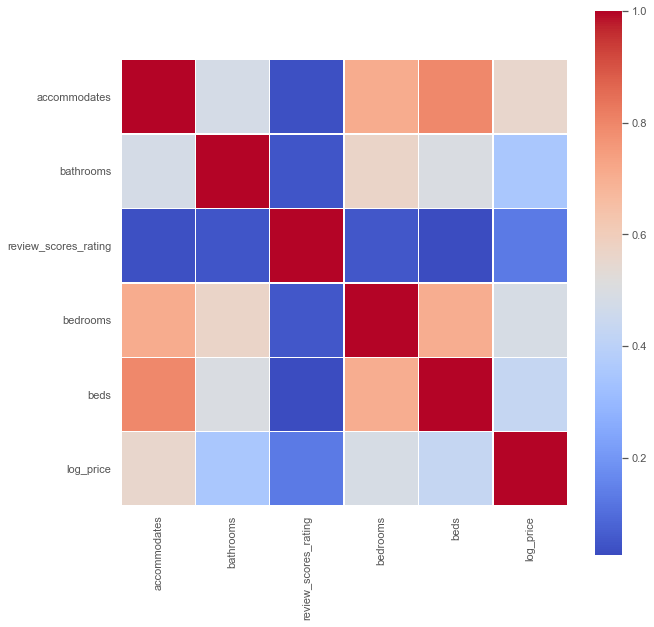

In [57]:
corr = data1.corr()

plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 10))
g = sns.heatmap(corr, cmap='coolwarm', square=True, linecolor='w', linewidth=.5)
plt.show()

In [58]:
data1['cleaning_fee'].value_counts(normalize = True, dropna = False)
data1['cleaning_fee'].replace({'False': 0, 'True': 1}, inplace=True)

In [59]:
data1.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3,1,strict,True,f,100.0,1,1,5.010635
1,Entire home/apt,7,1,strict,True,t,93.0,3,3,5.129899
2,Entire home/apt,5,1,moderate,True,t,92.0,1,3,4.976734
3,Entire home/apt,4,1,flexible,True,f,96.0,2,2,6.620073
4,Entire home/apt,2,1,moderate,True,t,40.0,0,1,4.744932


# Model Building:

# Linear Model Building

1. What we want to predict is the "Price". We will use the normalised version 'price_log' for modelling.
2. Before we proceed to modelling, we'll have to encode categorical features. We will drop categorical features like - Name 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build a Linear Regression model using the train data.
5. Verify linear regression assumptions.
6. Evaluate the model performance

In [79]:
#Defining X and y variables
X = data1.drop(['log_price','cancellation_policy'], axis=1)
y = data1[['log_price']]

print(X.head())
print(y.head())

         room_type  accommodates  bathrooms cleaning_fee instant_bookable  \
0  Entire home/apt             3          1         True                f   
1  Entire home/apt             7          1         True                t   
2  Entire home/apt             5          1         True                t   
3  Entire home/apt             4          1         True                f   
4  Entire home/apt             2          1         True                t   

   review_scores_rating  bedrooms  beds  
0                 100.0         1     1  
1                  93.0         3     3  
2                  92.0         1     3  
3                  96.0         2     2  
4                  40.0         0     1  
   log_price
0   5.010635
1   5.129899
2   4.976734
3   6.620073
4   4.744932


In [75]:
print(X.shape)
print(y.shape)

(52973, 8)
(52973, 1)


# Creating dummy variables

In [80]:
dummy_data = pd.get_dummies(data1)
dummy_data.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True,instant_bookable_f,instant_bookable_t
0,3,1,100.0,1,1,5.010635,1,0,0,0,0,1,0,1,1,0
1,7,1,93.0,3,3,5.129899,1,0,0,0,0,1,0,1,0,1
2,5,1,92.0,1,3,4.976734,1,0,0,0,1,0,0,1,0,1
3,4,1,96.0,2,2,6.620073,1,0,0,1,0,0,0,1,1,0
4,2,1,40.0,0,1,4.744932,1,0,0,0,1,0,0,1,0,1


# Split the data into train and test

In [82]:
  X = dummy_data
X.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True,instant_bookable_f,instant_bookable_t
0,3,1,100.0,1,1,5.010635,1,0,0,0,0,1,0,1,1,0
1,7,1,93.0,3,3,5.129899,1,0,0,0,0,1,0,1,0,1
2,5,1,92.0,1,3,4.976734,1,0,0,0,1,0,0,1,0,1
3,4,1,96.0,2,2,6.620073,1,0,0,1,0,0,0,1,1,0
4,2,1,40.0,0,1,4.744932,1,0,0,0,1,0,0,1,0,1


In [84]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
X_train.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_False,cleaning_fee_True,instant_bookable_f,instant_bookable_t
70304,3,1,93.0,2,2,4.795791,1,0,0,0,1,0,0,1,1,0
69497,1,1,80.0,1,1,3.806662,0,1,0,0,0,1,1,0,1,0
31488,5,2,96.0,2,4,5.703782,1,0,0,0,1,0,0,1,1,0
9492,1,1,98.0,1,1,3.637586,0,1,0,0,0,1,0,1,1,0
20467,2,0,97.0,0,1,4.595120,1,0,0,0,1,0,0,1,1,0


# Choose Model, Train and Evaluate

In [86]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)       

Intercept of the linear equation: [2.66453526e-15]

COefficients of the equation are: [[ 1.84374554e-16 -3.61632112e-16  9.29681816e-18  3.74392079e-17
   8.57602849e-17  1.00000000e+00 -6.82459171e-16 -6.14424718e-16
  -9.09875298e-16  1.90557423e-16  5.89533259e-16  6.37383212e-16
  -3.53014049e-16  2.79630110e-16 -5.36572374e-17  3.97794496e-17]]


# lets look at model performances

In [87]:
# Mean Absolute Error on test
mean_absolute_error(y_test, pred)

5.016542597047775e-16

The mean absolute error (MAE) is the simplest regression error metric to understand. We'll calculate the residual for every data point, taking only the absolute value of each so that negative and positive residuals do not cancel out. We then take the average of all these residuals. Effectively, MAE describes the typical magnitude of the residuals.

In [88]:

# RMSE on test data
mean_squared_error(y_test, pred)**0.5

7.568406226890807e-16

The root mean square error (RMSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value. And then takes the square root of the value.

In [89]:
# R2 Squared: on test
r2_score(y_test, pred)

1.0

# Conclusion:

- R^2 (coefficient of determination) regression score function.

- Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

- Here R^2 value is 1.0 which means that in this model independent variables are able to explain 100% of variances in dependent variable

# Add-on: **statsmodels**

- Here is the complete syntax to perform the linear regression in Python using statsmodels.
- Statsmodels is a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration

In [92]:
# Lets us build linear regression model using statsmodel 

X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.465e+31
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:21:36   Log-Likelihood:             1.1433e+06
No. Observations:               37081   AIC:                        -2.287e+06
Df Residuals:                   37065   BIC:                        -2.286e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

** Observation**
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) than any variable with p-values less than 0.05 would be considered significant.
- Negative values of coefficient shows that, log_price deceases with their increase.
- Positive values of coefficient shows that, log_price inceases with their increase.
- But these variables might contain Multicollinearity which affects the p values, so we first need to deal with multicollinearity and then look for p values 


## Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **1.0**, which is very good!
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables (features: like Country, status, Adult mortality and so on..) coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
    - In our case, the value for const coeff is **-114.81**

3. **Schooling coeff**: It represents the change in the output Y due to a change of one unit in the Schooling (everything else held constant).
4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
5. **P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent feature is not significant 

    Ha : Independent feature is that it is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level
  - A p-value of less than 0.05 is considered to be statistically significant.

   
6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

# Checking the Linear Regression Assumptions

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedacity
4. Linearity of variables
5. Normality of error terms

# Let's check Multicollinearity using VIF scores

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βkis “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                              0.000000
accommodates                       3.733421
bathrooms                          1.568589
review_scores_rating               1.025479
bedrooms                           2.632856
beds                               3.193307
log_price                          2.012200
room_type_Entire home/apt       2473.871477
room_type_Private room          2367.700384
room_type_Shared room            352.014531
cancellation_policy_flexible    2605.491925
cancellation_policy_moderate    2579.430786
cancellation_policy_strict      3296.836298
cleaning_fee_False              5026.889892
cleaning_fee_True               5027.884082
instant_bookable_f                      inf
instant_bookable_t                      inf
dtype: float64



* cleaning_fee_False and cleaning_fee_True have a VIF score of much greater than 5
* clearly these 2 variables are correlated with each other

## Removing Multicollinearity
 * To remove multicollinearity
  1. Drop every column one by one, that has VIF score greater than 5.
  2. Look at the adjusted R square of all these models
  3. Drop the Variable that makes least change in Adjusted-R square
  4. Check the VIF Scores again
  5. Continue till you get all VIF scores under 5

In [95]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1.drop('cleaning_fee_False', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                              0.000000
accommodates                       3.804934
bathrooms                          1.576481
review_scores_rating               1.026795
bedrooms                           2.644076
beds                               3.200664
log_price                          1.995753
room_type_Entire home/apt       2166.945714
room_type_Private room          2074.101663
room_type_Shared room            310.539866
cancellation_policy_flexible    1460.313405
cancellation_policy_moderate    1437.954124
cancellation_policy_strict      1847.704036
cleaning_fee_True                  1.146430
instant_bookable_f                      inf
instant_bookable_t                      inf
dtype: float64



* room_type_Entire home/apt  and room_type_Private room also have  VIF score of much greater than 5
* Also , cancellation_policy_flexible ,cancellation_policy_moderate and cancellation_policy_strict have scores greter than 5
* Hence , these variables are correlated with each other

In [100]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1.drop('room_type_Entire home/apt', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                              0.000000
accommodates                       3.804723
bathrooms                          1.576473
review_scores_rating               1.026788
bedrooms                           2.644163
beds                               3.200732
log_price                          1.995759
room_type_Private room             1.625253
room_type_Shared room              1.238885
cancellation_policy_flexible    1825.159270
cancellation_policy_moderate    1797.128373
cancellation_policy_strict      2309.275659
cleaning_fee_False              8820.688313
cleaning_fee_True               8821.216812
instant_bookable_f                      inf
instant_bookable_t                      inf
dtype: float64



In [101]:
# we drop the one with the highest vif values and check the Adjusted-R Squared
X_train2 = X_train1.drop('cancellation_policy_strict', axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

const                              0.000000
accommodates                       3.804814
bathrooms                          1.576480
review_scores_rating               1.026794
bedrooms                           2.643934
beds                               3.200526
log_price                          1.995763
room_type_Entire home/apt       2166.945622
room_type_Private room          2074.101661
room_type_Shared room            310.539865
cancellation_policy_flexible       1.291023
cancellation_policy_moderate       1.181747
cleaning_fee_False              7057.633264
cleaning_fee_True               7057.314305
instant_bookable_f                      inf
instant_bookable_t                      inf
dtype: float64



In [102]:
olsmod1 = sm.OLS(y_train, X_train2)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.406e+32
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:09:04   Log-Likelihood:             1.1839e+06
No. Observations:               37081   AIC:                        -2.368e+06
Df Residuals:                   37066   BIC:                        -2.368e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Now cleaning_fee_False   has highest p value among all variables with p value greater than 0.05, so we'll drop that 

In [104]:
# we drop the one with the highest vif values
X_train3 = X_train1.drop('cleaning_fee_False', axis=1)
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series3))

Series before feature selection: 

const                              0.000000
accommodates                       3.804934
bathrooms                          1.576481
review_scores_rating               1.026795
bedrooms                           2.644076
beds                               3.200664
log_price                          1.995753
room_type_Entire home/apt       2166.945714
room_type_Private room          2074.101663
room_type_Shared room            310.539866
cancellation_policy_flexible    1460.313405
cancellation_policy_moderate    1437.954124
cancellation_policy_strict      1847.704036
cleaning_fee_True                  1.146430
instant_bookable_f                      inf
instant_bookable_t                      inf
dtype: float64



In [105]:
olsmod1 = sm.OLS(y_train, X_train3)
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.111e+31
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:24:27   Log-Likelihood:             1.1611e+06
No. Observations:               37081   AIC:                        -2.322e+06
Df Residuals:                   37066   BIC:                        -2.322e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [106]:
X_train4 = X_train3.drop(['cancellation_policy_strict'], axis=1)

In [107]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.616e+31
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:35:20   Log-Likelihood:             1.1619e+06
No. Observations:               37081   AIC:                        -2.324e+06
Df Residuals:                   37067   BIC:                        -2.324e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [113]:
X_train5 = X_train4.drop(['cancellation_policy_moderate'], axis=1)

In [114]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.615e+32
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:43:52   Log-Likelihood:             1.1836e+06
No. Observations:               37081   AIC:                        -2.367e+06
Df Residuals:                   37068   BIC:                        -2.367e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Now no feature has p value greater than 0.05, so we'll consider features in X_train5 as the final ones and olsres4 as final model

### Observations
* Now Adjusted R-squared is 1.000, Our model is able to explain 100% of variance that shows model is very good.


### Now we'll check rest of the assumptions on model - olsres7
1. Mean of residuals should be 0 
2. Linearity of variables
3. Normality of error terms
4. No Heteroscedacity

### Mean of residuals should be 0

In [115]:
residual= olsres4.resid
np.mean(residual)

6.802525532925176e-16

### TEST FOR LINEARITY 

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

In [117]:
residual=olsres4.resid
fitted=olsres4.fittedvalues #predicted values

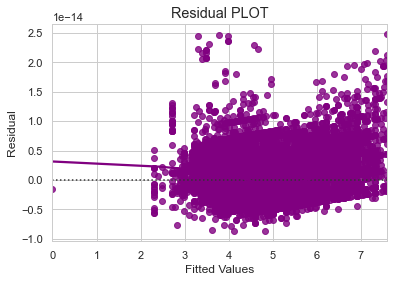

In [119]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
No pattern in residual hence 1st assumptions is satisfied

### TEST FOR NORMALITY

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What is the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh etc as per our data

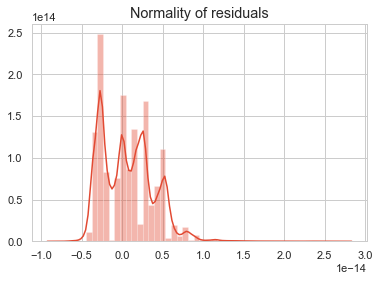

In [120]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

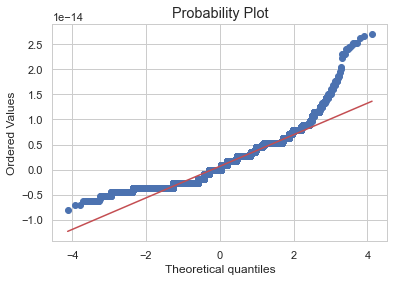

In [121]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

In [122]:
stats.shapiro(residual)

ShapiroResult(statistic=0.9366294741630554, pvalue=0.0)

### TEST FOR HOMOSCEDASTICITY

* Test -goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [123]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train5)
lzip(name, test)

[('F statistic', 0.9855578539671405), ('p-value', 0.8389285246461357)]

Since p-value > 0.05 we can say that the residuals are homoscedastic. This assumption is therefore valid in the data.

### Now we have checked all the assumptions and they are satisfied, so we can move towards prediction part

In [124]:
X_train5.columns

Index(['const', 'accommodates', 'bathrooms', 'review_scores_rating',
       'bedrooms', 'beds', 'log_price', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_flexible', 'cleaning_fee_True',
       'instant_bookable_f', 'instant_bookable_t'],
      dtype='object')

In [125]:
X_test_final = X_test[X_train5.columns]

In [126]:
X_test_final.head()

,const,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cleaning_fee_True,instant_bookable_f,instant_bookable_t
433,1.0,4,2,93.0,3,3,5.700444,1,0,0,0,1,1,0
20404,1.0,2,1,100.0,1,1,4.844187,1,0,0,0,0,1,0
65294,1.0,5,1,100.0,1,2,5.476464,1,0,0,0,1,1,0
58563,1.0,4,1,95.0,1,1,5.075174,1,0,0,0,1,1,0
923,1.0,1,1,96.0,1,1,4.317488,0,1,0,1,0,1,0


In [129]:
y_pred = olsres4.predict(X_test_final)

### Checking the performance on train and test: metric used - RMSE

In [130]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test error:',rms1)

Train error: 3.3183561207537815e-15
Test error: 3.316649303990671e-15


### Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting .
### Hence we can conclude the model "olsres4" is good for prediction as well as inference purpose

In [133]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.615e+32
Date:                Thu, 29 Apr 2021   Prob (F-statistic):               0.00
Time:                        23:58:17   Log-Likelihood:             1.1836e+06
No. Observations:               37081   AIC:                        -2.367e+06
Df Residuals:                   37068   BIC:                        -2.367e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Observations
* Now this is our final model which follows all the assumptions and this can be used for interpretations

          1.The accommodates, review_scores_rating,bedrooms, beds are variables which looks significant. 
          2.  Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting .